# Info
Name:  

    ORACLES_DARE_explore

Purpose:  

    view the calculated DARE values frrom the 4STAR skyscans, aod, and cloud retrieval

Input:

    None 

Output:

    Figure and save files

Keywords:

    none

Dependencies:

    - load_utils.py
    - matplotlib
    - numpy
  
Needed Files:
  - file.rc : for consistent creation of look of matplotlib figures
  - ...

Modification History:
    Written: Samuel LeBlanc, Santa Cruz, CA, 2019-12-03
    Modified: 


# Prepare python environment

In [1]:
import numpy as np
from path_utils import getpath
import hdf5storage as hs
import scipy.io as sio
import matplotlib.pyplot as plt
import os

/usr/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import Sp_parameters as Sp
import load_utils as lu
import write_utils as wu
import plotting_utils as pu

In [3]:
%matplotlib notebook

In [22]:
name = 'ORACLES'
vv = 'v2'
fp = getpath(name)

Return path named:  ORACLES /mnt/c/Users/lebla/Research/ORACLES/


# Load files

## Load DARE calculations

In [8]:
s = hs.loadmat(fp+'model/ORACLES_DARE_{}.mat'.format(vv))

In [9]:
s.keys()

[u'dn',
 u'ext',
 u'dn_noa',
 u'ref',
 u'asy',
 u'sza',
 u'lon',
 u'zout',
 u'up',
 u'up_noa',
 u'doy',
 u'cod',
 u'wvl',
 u'lat',
 u'ssa',
 u'dare',
 u'utc']

In [10]:
ss = hs.loadmat(fp+'model/ORACLES_DARE_aero_prop_{}.mat'.format(vv))

In [11]:
s['sza'] = ss['sza']

## Load DARE parameters from SARE

In [12]:
sa = sio.loadmat(fp+'ORACLES_2016_DARE_params_{}.mat'.format(vv))

In [13]:
sa.keys()

['boxes_ns',
 'boxes_diag',
 'boxes_ew_ct',
 'boxes_ew',
 'utc',
 'lon',
 'sza',
 'boxes_ns_ct',
 '__header__',
 '__globals__',
 'bins_ew',
 'bins_ns',
 'bins_diag',
 'lat',
 '__version__',
 'boxes_diag_ct',
 'dare',
 'doy']

# Plot out data

In [14]:
s['doy']

array([244, 244, 244, ..., 271, 271, 271])

In [15]:
s['doys'] = s['doy']+s['utc']/24.0

In [16]:
ibad = (s['ref']==0.0) | (s['ref']>=25.0) | (s['cod']==0.0)

/home/samuel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.


In [17]:
s['cod'][ibad] = np.nan
s['ref'][ibad] = np.nan
s['dn'][ibad,:] = np.nan
s['up'][ibad,:] = np.nan
s['dn_noa'][ibad,:] = np.nan
s['up_noa'][ibad,:] = np.nan
s['dare'][ibad,:] = np.nan

## Plot the time trace

<IPython.core.display.Javascript object>


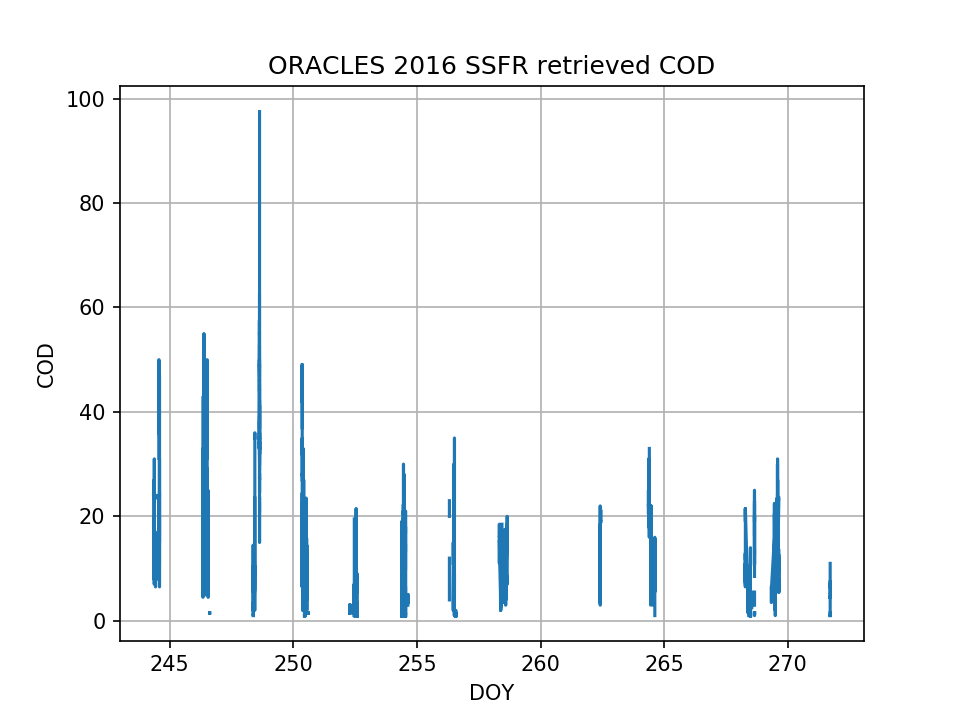

Text(0.5,1,'ORACLES 2016 SSFR retrieved COD')

In [18]:
plt.figure()
plt.plot(s['doys'],s['cod'])
plt.xlabel('DOY')
plt.ylabel('COD')
plt.grid()
plt.title('ORACLES 2016 SSFR retrieved COD')

<IPython.core.display.Javascript object>


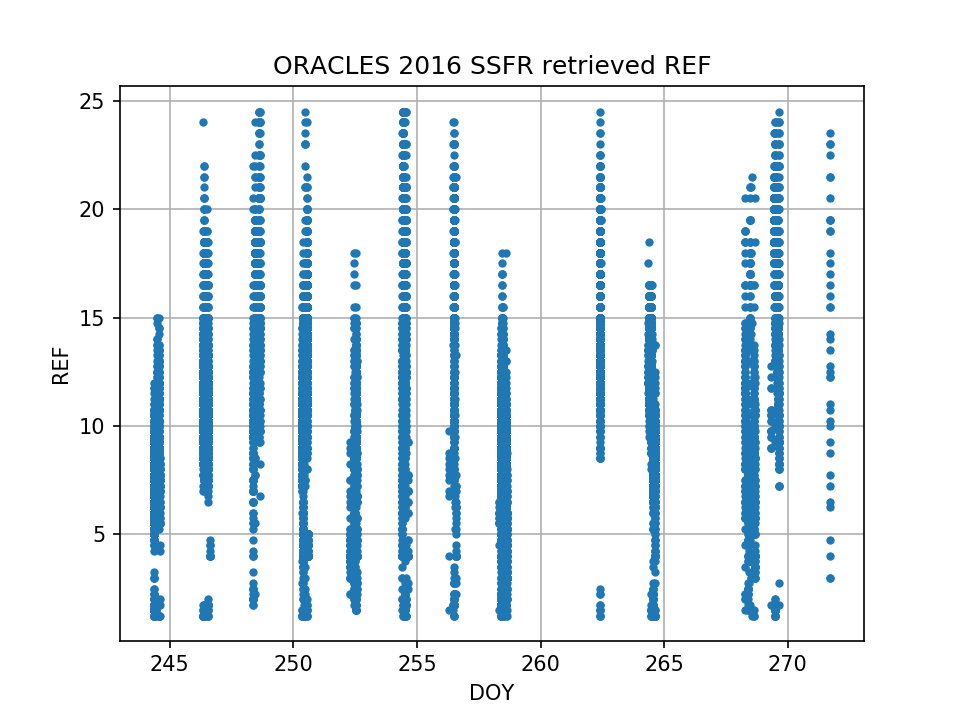

Text(0.5,1,'ORACLES 2016 SSFR retrieved REF')

In [19]:
plt.figure()
plt.plot(s['doys'],s['ref'],'.')
plt.xlabel('DOY')
plt.ylabel('REF')
plt.grid()
plt.title('ORACLES 2016 SSFR retrieved REF')

## histogram of retrieved properties

<IPython.core.display.Javascript object>


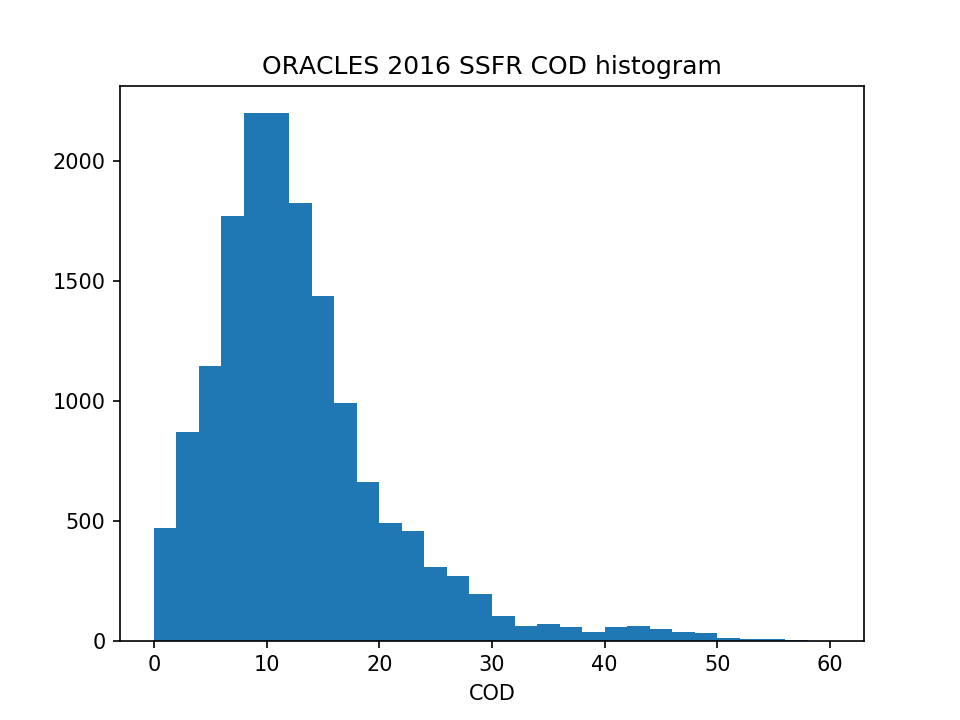

/home/samuel/.local/lib/python2.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/samuel/.local/lib/python2.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5,1,'ORACLES 2016 SSFR COD histogram')

In [20]:
plt.figure()
plt.hist(s['cod'],range=[0,60],bins=30)
plt.xlabel('COD')
plt.title('ORACLES 2016 SSFR COD histogram')

<IPython.core.display.Javascript object>


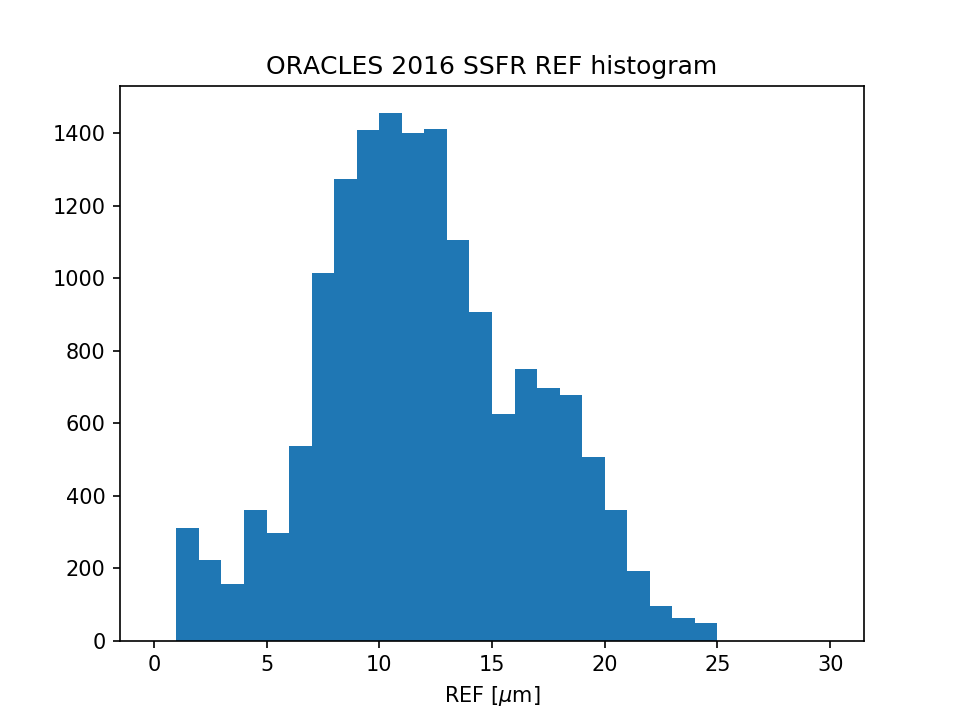

Text(0.5,1,'ORACLES 2016 SSFR REF histogram')

In [21]:
plt.figure()
plt.hist(s['ref'],range=[0,30],bins=30)
plt.xlabel('REF [${{\\mu}}$m]')
plt.title('ORACLES 2016 SSFR REF histogram')

<IPython.core.display.Javascript object>


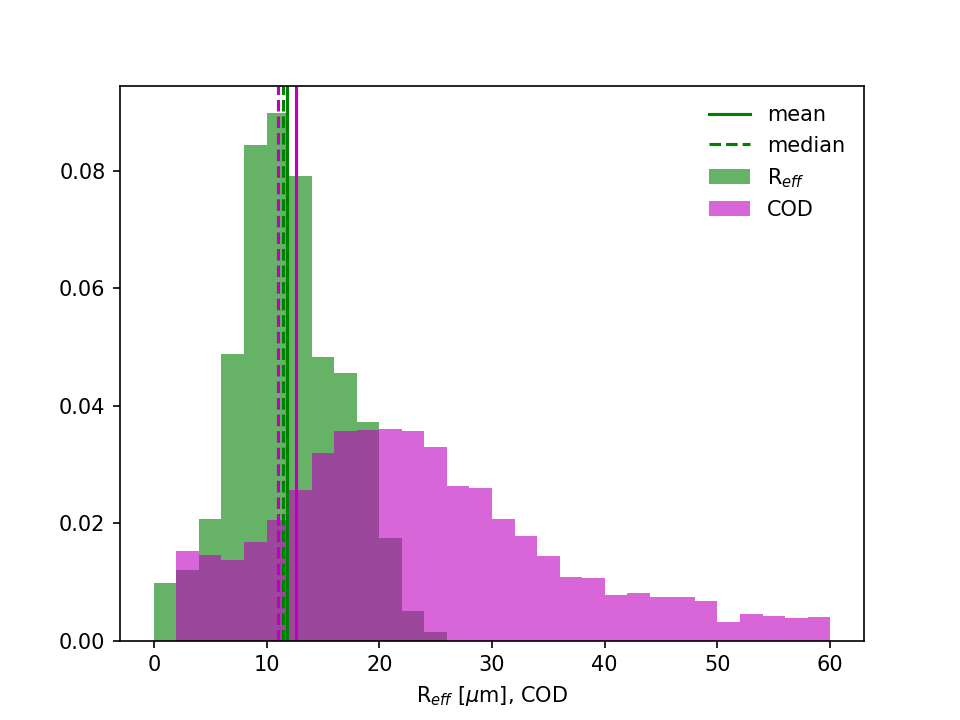

In [24]:
plt.figure()
plt.hist(s['ref'],range=[0,60],bins=30,label='R$_{{eff}}$',alpha=0.6,normed=True,color='g')
plt.hist(s['cod']*2,range=[0,60],bins=30,label='COD',alpha=0.6,normed=True,color='m')

plt.axvline(np.nanmean(s['ref']),ls='-',color='g',label='mean')
plt.axvline(np.nanmedian(s['ref']),ls='--',color='g',label='median')

plt.axvline(np.nanmean(s['cod']),ls='-',color='m')
plt.axvline(np.nanmedian(s['cod']),ls='--',color='m')
plt.legend(frameon=False)

plt.xlabel('R$_{{eff}}$ [$\mu$m], COD')
plt.savefig(fp+'plot_DARE/ORACLES2016_COD_REF_hist_{}.png'.format(vv),dpi=600,transparent=True)


In [25]:
np.nanmean(s['cod']*2.0),np.nanmedian(s['cod']*2.0)

(25.236914947156517, 22.0)

In [26]:
np.nanmean(s['ref']),np.nanmedian(s['ref'])

(11.829045042778057, 11.5)

In [27]:
s['ssa'].shape

(28619, 7)

## Aerosol products

<IPython.core.display.Javascript object>


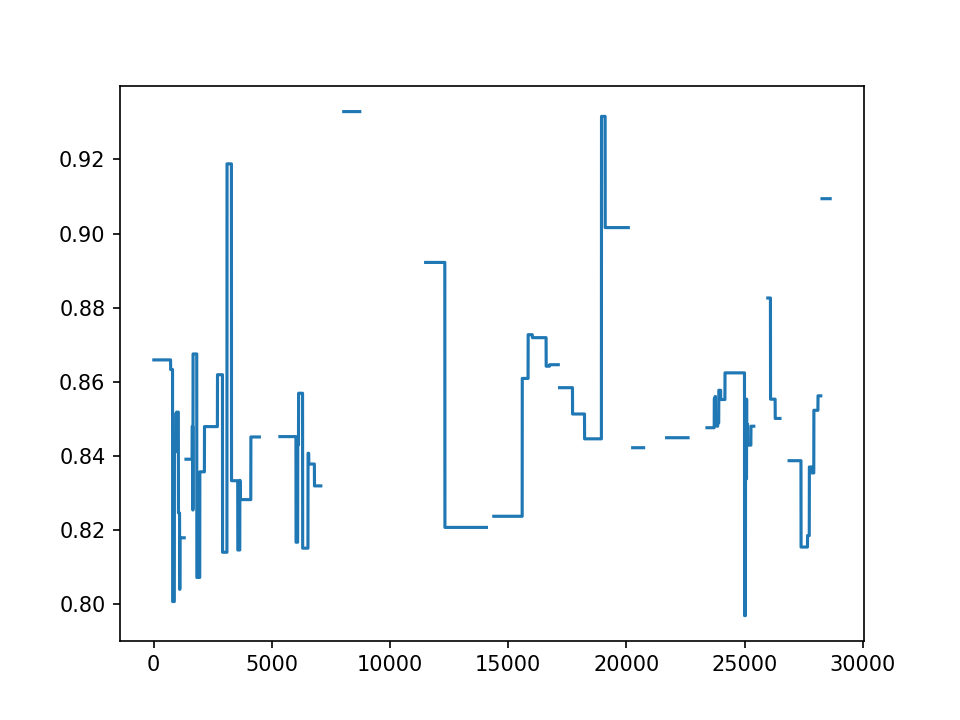

In [28]:
plt.figure()
plt.plot(s['ssa'][:,2])

<IPython.core.display.Javascript object>


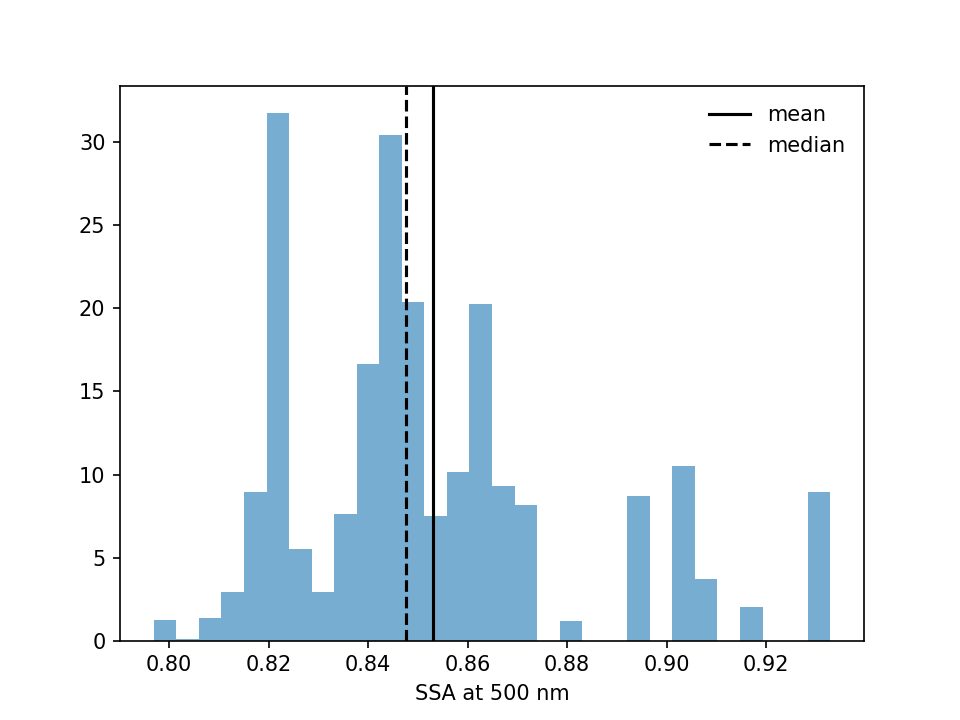

In [30]:
plt.figure()
plt.hist(s['ssa'][:,2],bins=30,range=[np.nanmin(s['ssa'][:,2]),np.nanmax(s['ssa'][:,2])],normed=True,alpha=0.6)
plt.axvline(np.nanmean(s['ssa'][:,2]),ls='-',color='k',label='mean')
plt.axvline(np.nanmedian(s['ssa'][:,2]),ls='--',color='k',label='median')
plt.legend(frameon=False)
plt.xlabel('SSA at 500 nm')
plt.savefig(fp+'plot_DARE/ORACLES2016_SSA_500_hist_{}.png'.format(vv),dpi=600,transparent=True)

In [31]:
np.nanmean(s['ssa'][:,2]),np.nanmedian(s['ssa'][:,2])

(0.8531073175475277, 0.8476)

<IPython.core.display.Javascript object>


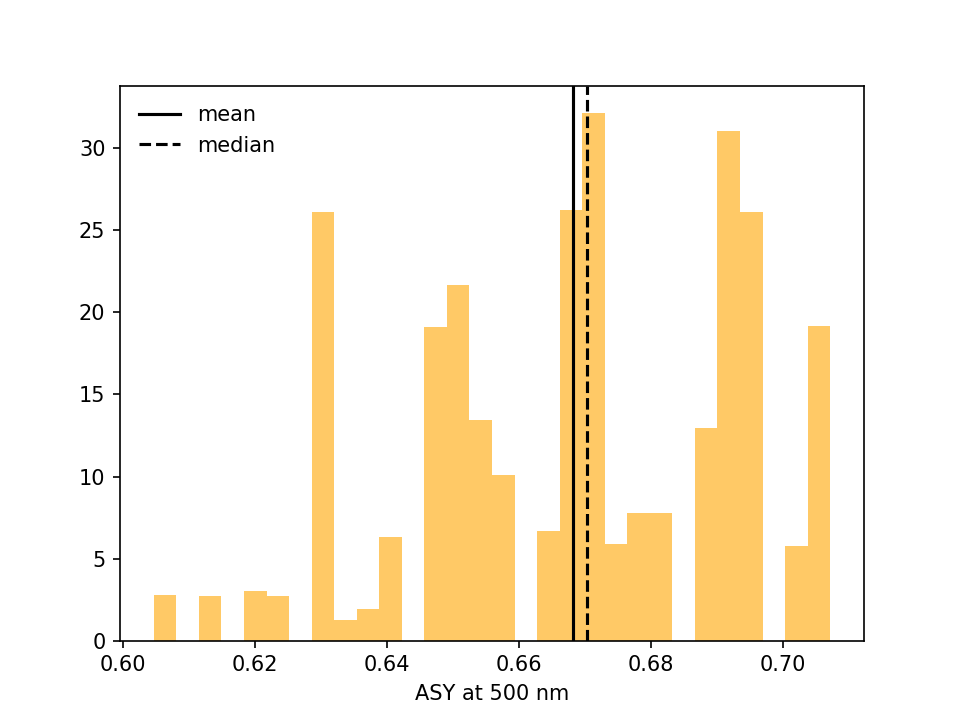

In [32]:
plt.figure()
plt.hist(s['asy'][:,2],bins=30,range=[np.nanmin(s['asy'][:,2]),np.nanmax(s['asy'][:,2])],normed=True,alpha=0.6,color='orange')
plt.axvline(np.nanmean(s['asy'][:,2]),ls='-',color='k',label='mean')
plt.axvline(np.nanmedian(s['asy'][:,2]),ls='--',color='k',label='median')
plt.legend(frameon=False)
plt.xlabel('ASY at 500 nm')
plt.savefig(fp+'plot_DARE/ORACLES2016_ASY_500_hist_{}.png'.format(vv),dpi=600,transparent=True)

In [33]:
s['wvl']

array([ 250.,  400.,  500.,  675.,  870.,  995., 4900.])

<IPython.core.display.Javascript object>


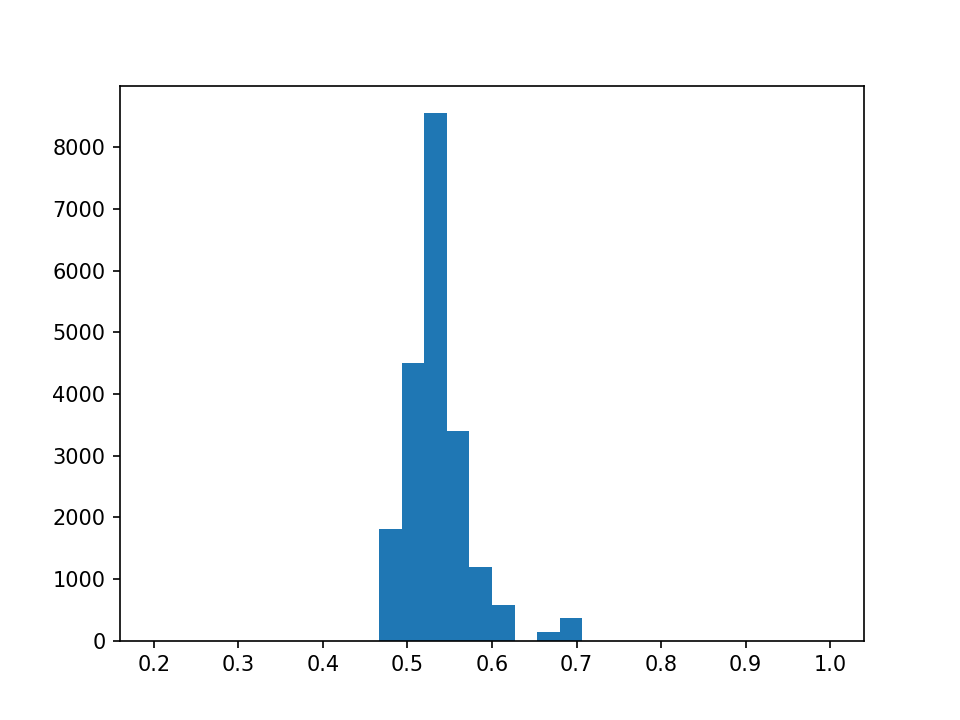

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 1814., 4510., 8558., 3395., 1190.,  583.,    0.,  144.,
         373.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.]),
 array([0.2       , 0.22666667, 0.25333333, 0.28      , 0.30666667,
        0.33333333, 0.36      , 0.38666667, 0.41333333, 0.44      ,
        0.46666667, 0.49333333, 0.52      , 0.54666667, 0.57333333,
        0.6       , 0.62666667, 0.65333333, 0.68      , 0.70666667,
        0.73333333, 0.76      , 0.78666667, 0.81333333, 0.84      ,
        0.86666667, 0.89333333, 0.92      , 0.94666667, 0.97333333,
        1.        ]),
 <a list of 30 Patch objects>)

In [34]:
plt.figure()
plt.hist(s['asy'][:,5],range=[0.2,1],bins=30)

<IPython.core.display.Javascript object>


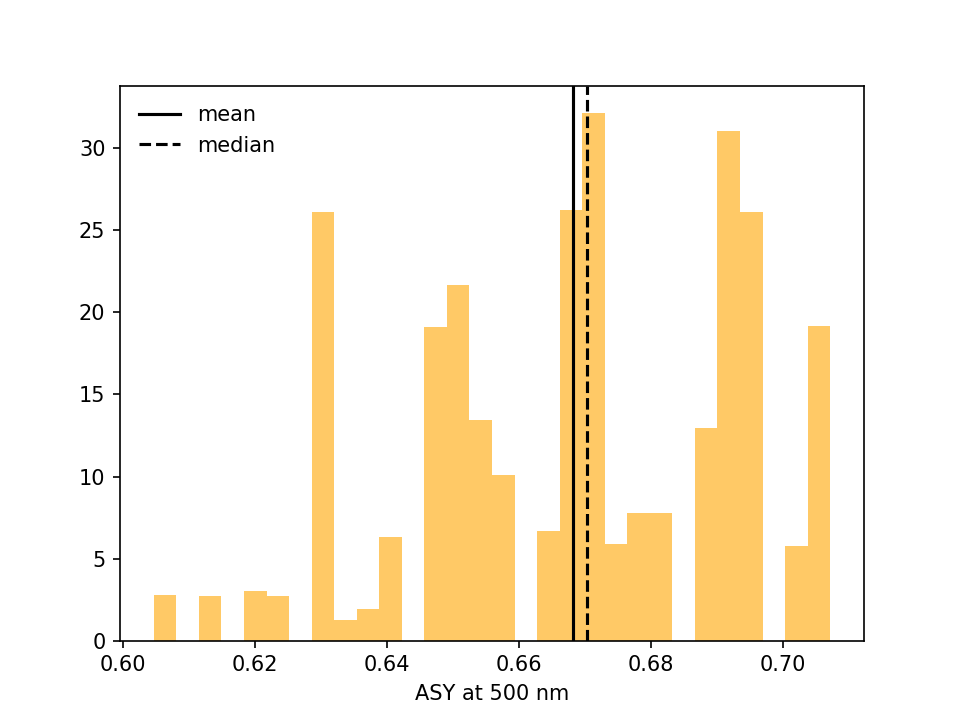

In [35]:
plt.figure()
plt.hist(s['asy'][:,2],bins=30,range=[np.nanmin(s['asy'][:,2]),np.nanmax(s['asy'][:,2])],normed=True,alpha=0.6,color='orange')
plt.axvline(np.nanmean(s['asy'][:,2]),ls='-',color='k',label='mean')
plt.axvline(np.nanmedian(s['asy'][:,2]),ls='--',color='k',label='median')
plt.legend(frameon=False)
plt.xlabel('ASY at 500 nm')
plt.savefig(fp+'plot_DARE/ORACLES2016_ASY_500_hist_{}.png'.format(vv),dpi=600,transparent=True)

In [36]:
np.nanmean(s['asy'][:,2]),np.nanmedian(s['asy'][:,2])

(0.6681958411180872, 0.6703360785587932)

In [37]:
s['ext'].shape

(28619, 7)

In [38]:
s['wvl']

array([ 250.,  400.,  500.,  675.,  870.,  995., 4900.])

<IPython.core.display.Javascript object>


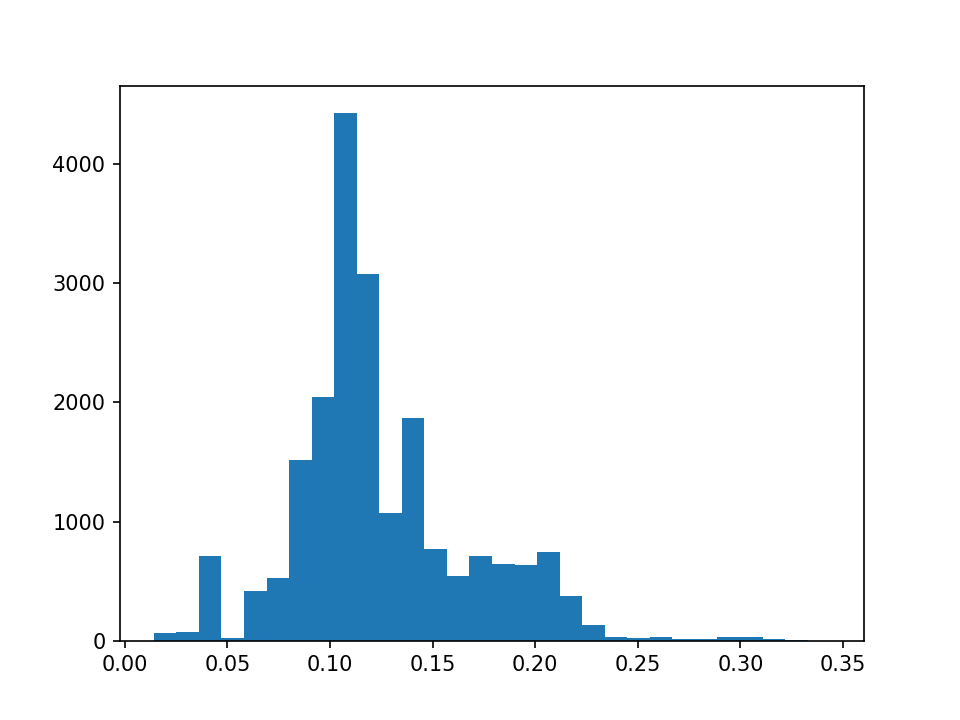

(array([6.200e+01, 7.700e+01, 7.100e+02, 2.000e+01, 4.200e+02, 5.280e+02,
        1.516e+03, 2.045e+03, 4.426e+03, 3.078e+03, 1.071e+03, 1.864e+03,
        7.700e+02, 5.400e+02, 7.090e+02, 6.450e+02, 6.370e+02, 7.410e+02,
        3.790e+02, 1.290e+02, 3.100e+01, 2.100e+01, 3.500e+01, 1.200e+01,
        1.100e+01, 3.600e+01, 3.400e+01, 1.600e+01, 3.000e+00, 1.000e+00]),
 array([0.01415892, 0.02514568, 0.03613244, 0.0471192 , 0.05810596,
        0.06909272, 0.08007948, 0.09106624, 0.102053  , 0.11303976,
        0.12402652, 0.13501328, 0.14600004, 0.1569868 , 0.16797356,
        0.17896032, 0.18994708, 0.20093384, 0.2119206 , 0.22290736,
        0.23389411, 0.24488087, 0.25586763, 0.26685439, 0.27784115,
        0.28882791, 0.29981467, 0.31080143, 0.32178819, 0.33277495,
        0.34376171]),
 <a list of 30 Patch objects>)

In [39]:
plt.figure()
plt.hist(s['ext'][:,2],range=[np.nanmin(s['ext'][:,2]),np.nanmax(s['ext'][:,2])],bins=30)

## DARE

In [40]:
s.keys()

[u'dn',
 u'ext',
 'doys',
 u'dn_noa',
 u'ref',
 u'asy',
 u'sza',
 u'lon',
 u'zout',
 u'up',
 u'up_noa',
 u'doy',
 u'cod',
 u'wvl',
 u'lat',
 u'ssa',
 u'dare',
 u'utc']

In [41]:
import cmaps

<IPython.core.display.Javascript object>


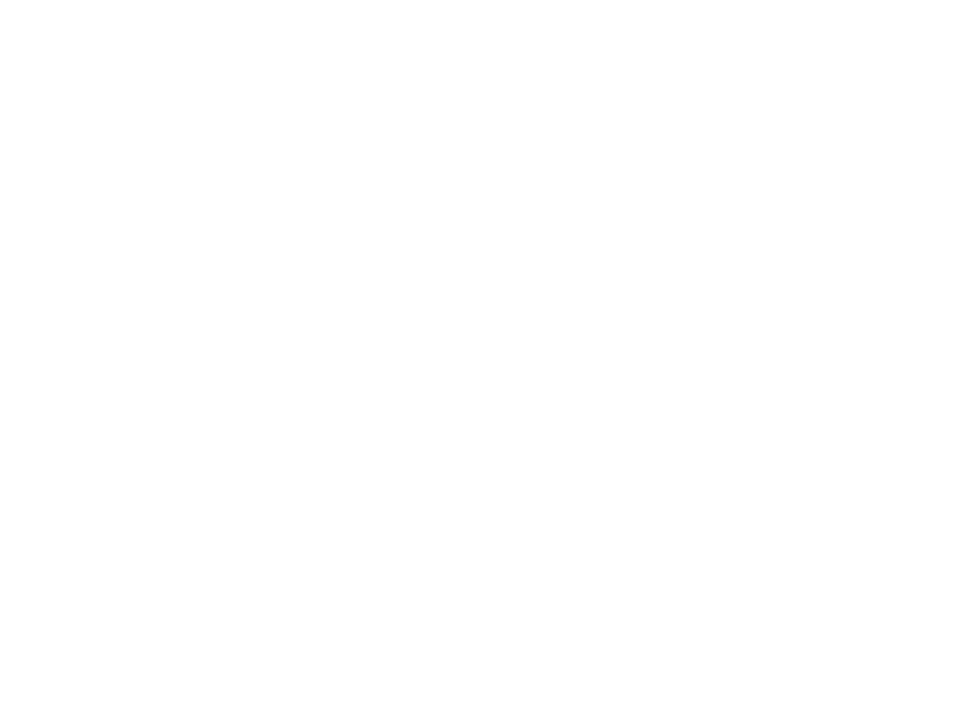

<IPython.core.display.Javascript object>


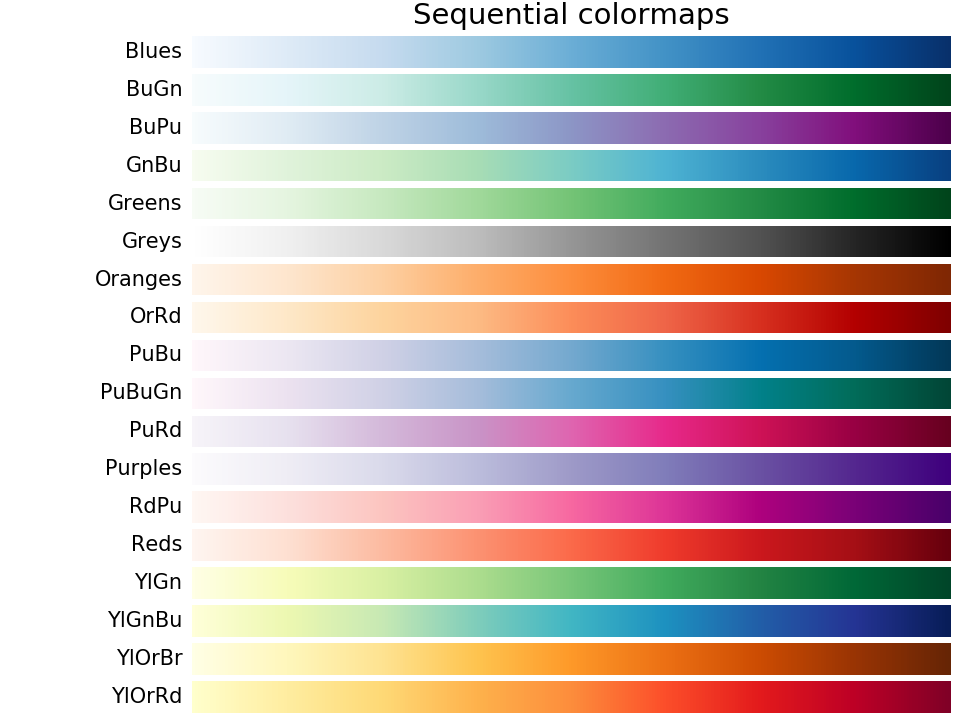

<IPython.core.display.Javascript object>


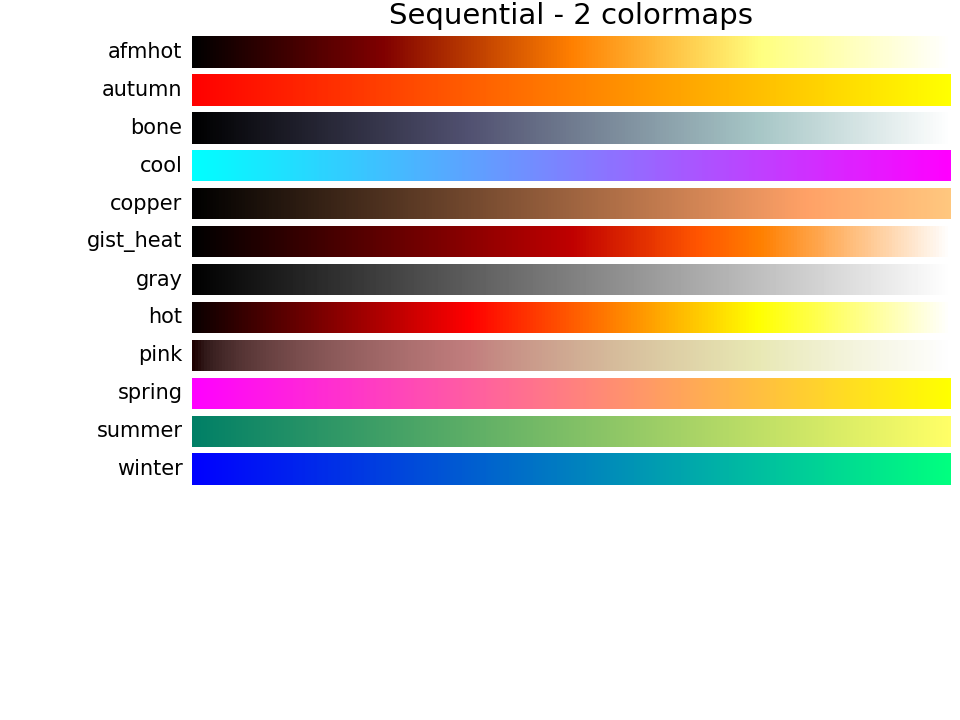

<IPython.core.display.Javascript object>


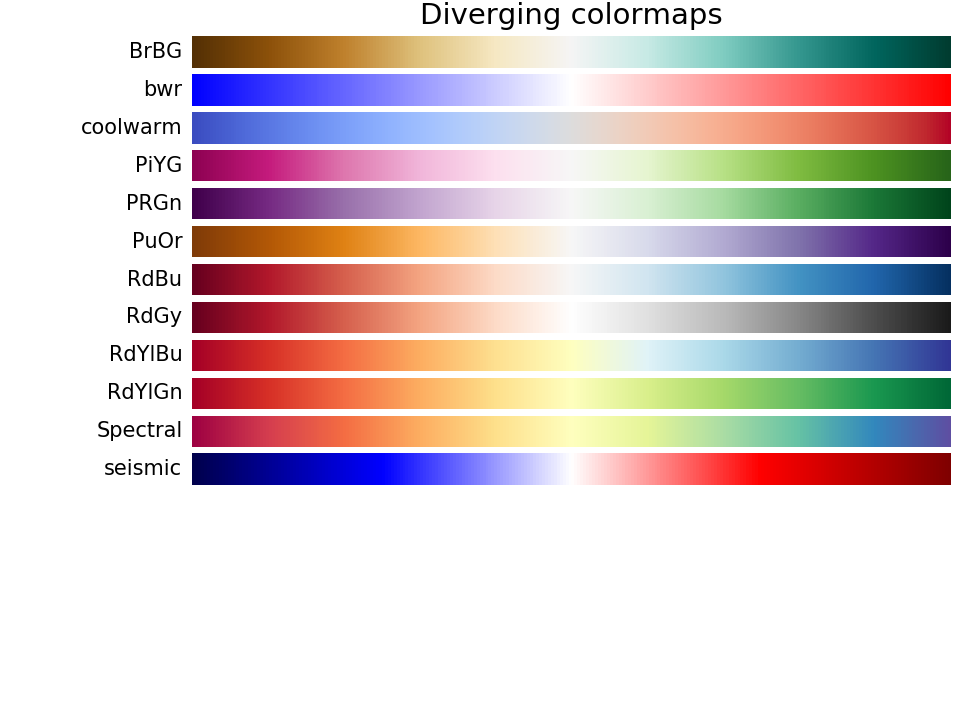

<IPython.core.display.Javascript object>


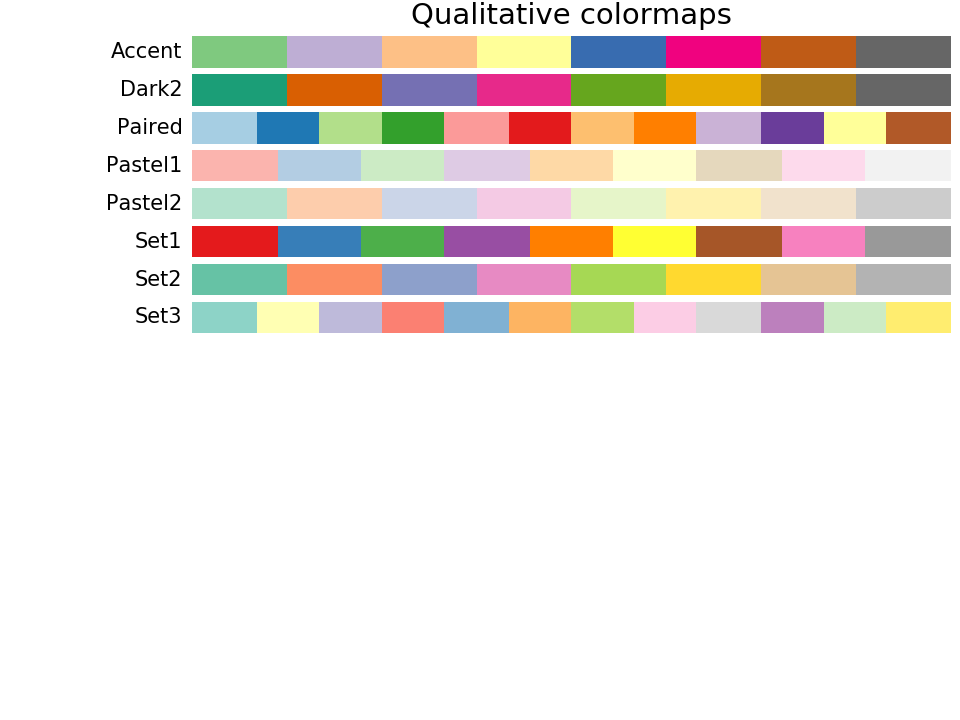

<IPython.core.display.Javascript object>


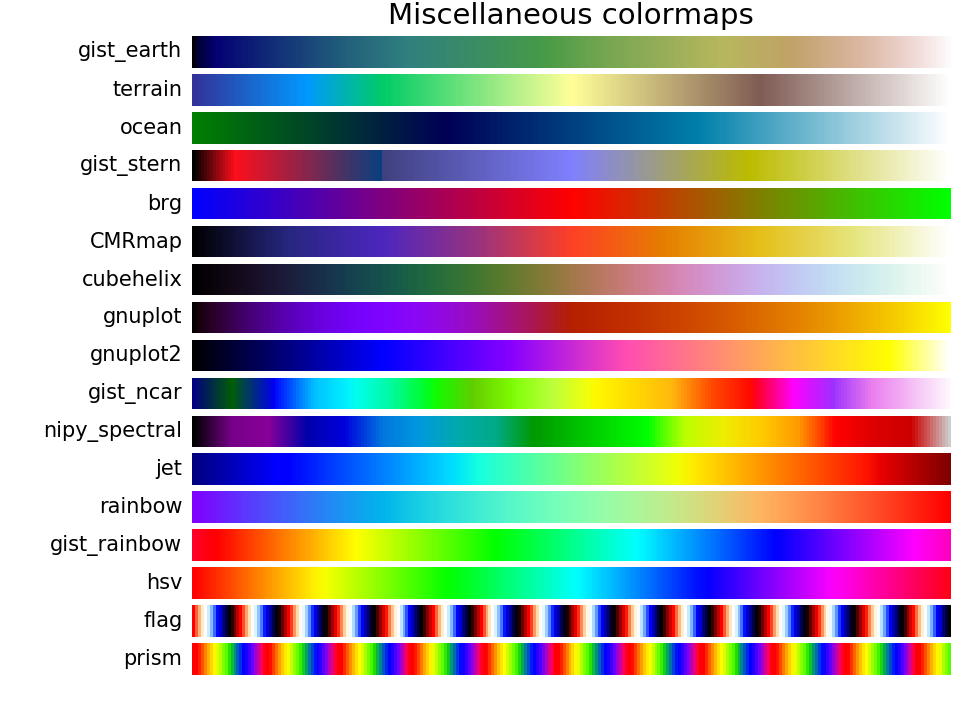

In [34]:
plt.figure()
cmaps.cmaps()

<IPython.core.display.Javascript object>


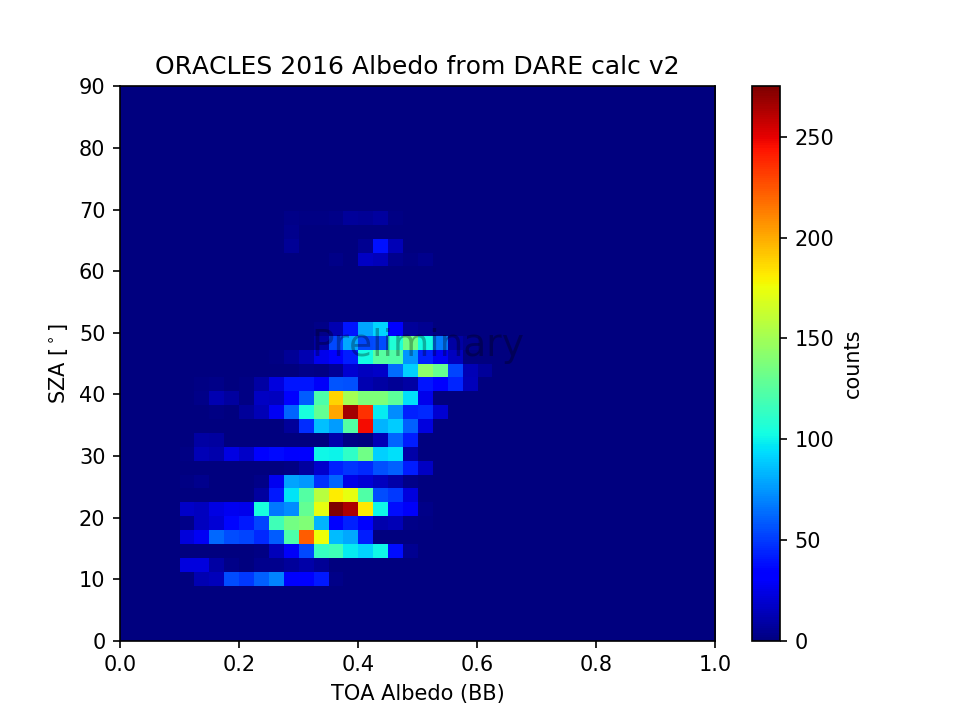

In [42]:
plt.figure()
plt.hist2d(s['up'][:,2]/s['dn'][:,2],s['sza'],bins=40,range=[[0,1],[0,90]],cmap=plt.cm.jet)
plt.ylabel('SZA [$^\\circ$]')
plt.xlabel('TOA Albedo (BB)')
plt.title('ORACLES 2016 Albedo from DARE calc {}'.format(vv))

cb = plt.colorbar()
cb.set_label('counts')
pu.prelim()

plt.savefig(fp+'plot/ORACLES_2016_albedo_from_calc_vs_SZA_{}.png'.format(vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


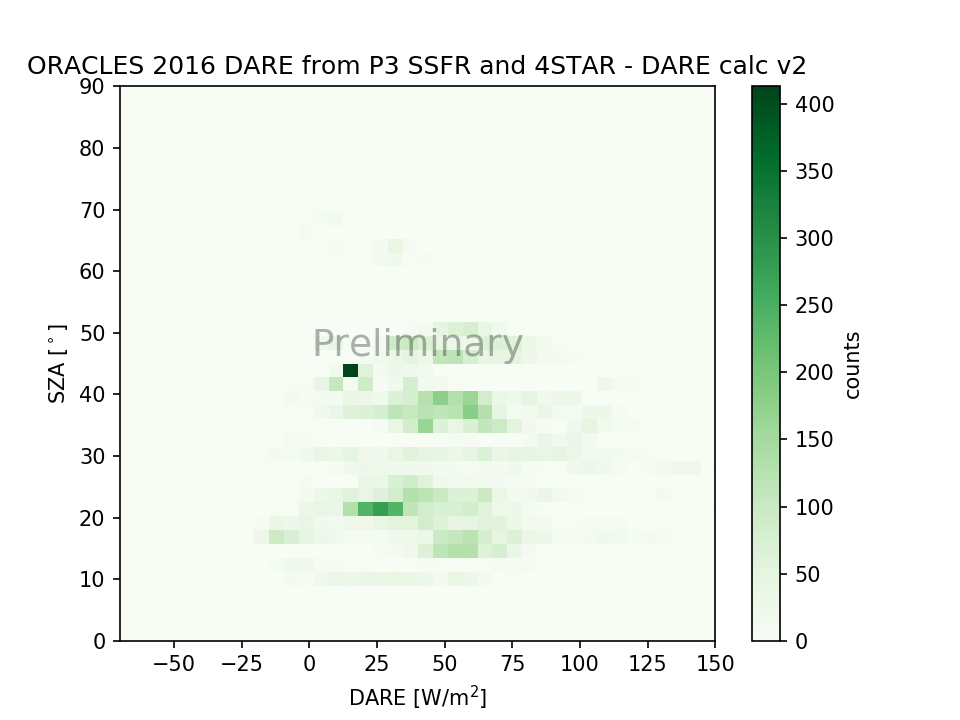

In [43]:
plt.figure()
plt.hist2d(s['dare'][:,2],s['sza'],bins=40,range=[[-70,150],[0,90]],cmap=plt.cm.Greens)
plt.ylabel('SZA [$^\\circ$]')
plt.xlabel('DARE [W/m$^2$]')
plt.title('ORACLES 2016 DARE from P3 SSFR and 4STAR - DARE calc {}'.format(vv))

cb = plt.colorbar()
cb.set_label('counts')
pu.prelim()

plt.savefig(fp+'plot/ORACLES_2016_DARE_from_calc_vs_SZA_{}.png'.format(vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


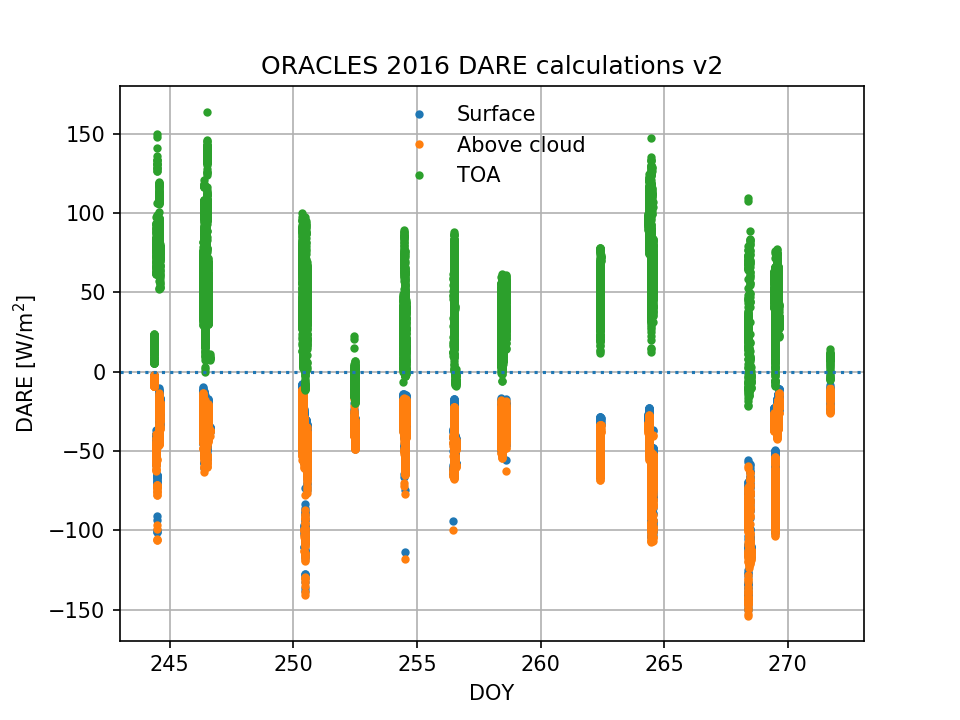

In [44]:
plt.figure()
plt.plot(s['doys'],s['dare'][:,0],'.',label='Surface')
plt.plot(s['doys'],s['dare'][:,1],'.',label='Above cloud')
plt.plot(s['doys'],s['dare'][:,2],'.',label='TOA')
plt.axhline(0,ls=':')
plt.legend(frameon=False)
plt.xlabel('DOY')
plt.ylabel('DARE [W/m$^{{2}}$]')
plt.title('ORACLES 2016 DARE calculations {}'.format(vv))
plt.grid()
plt.savefig(fp+'plot_DARE/ORACLES_2016_DARE_{}.png'.format(vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


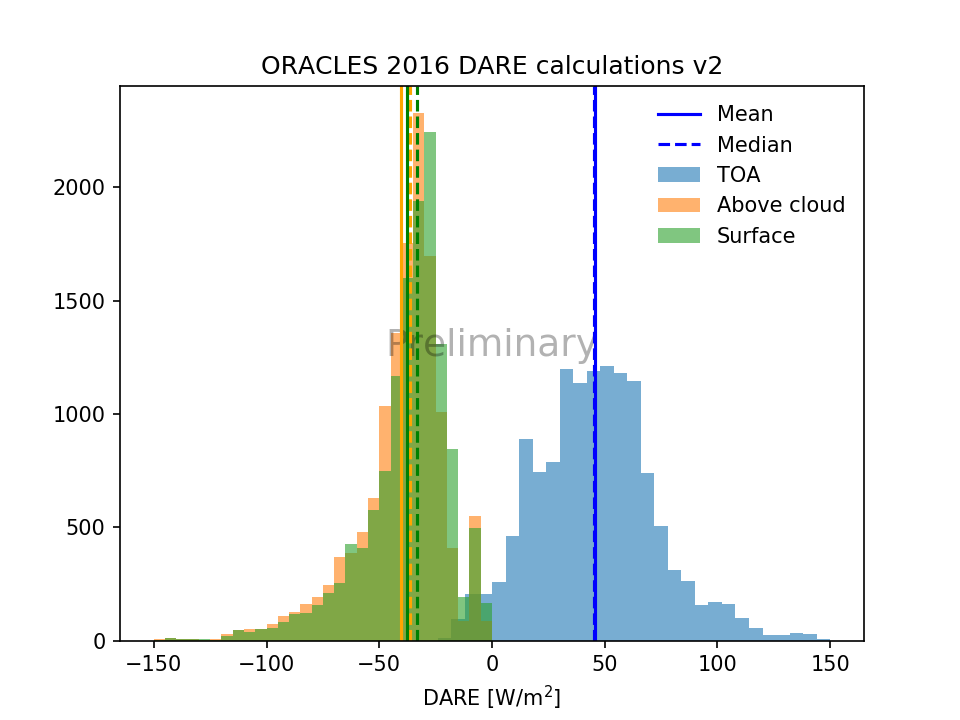

In [46]:
plt.figure()
plt.hist(s['dare'][:,2],range=[-30,150],bins=30,label='TOA',alpha=0.6)
plt.hist(s['dare'][:,1],range=[-150,0],bins=30,label='Above cloud',alpha=0.6)
plt.hist(s['dare'][:,0],range=[-150,0],bins=30,label='Surface',alpha=0.6)

plt.axvline(np.nanmean(s['dare'][:,2]),ls='-',color='b',label='Mean')
plt.axvline(np.nanmedian(s['dare'][:,2]),ls='--',color='b',label='Median')
plt.axvline(np.nanmean(s['dare'][:,1]),ls='-',color='orange')
plt.axvline(np.nanmedian(s['dare'][:,1]),ls='--',color='orange')
plt.axvline(np.nanmean(s['dare'][:,0]),ls='-',color='g')
plt.axvline(np.nanmedian(s['dare'][:,0]),ls='--',color='g')

pu.prelim()

plt.xlabel('DARE [W/m$^{{2}}$]')
plt.legend(frameon=False)

plt.title('ORACLES 2016 DARE calculations {}'.format(vv))
plt.savefig(fp+'plot_DARE/ORACLES_2016_DARE_hist_{}.png'.format(vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


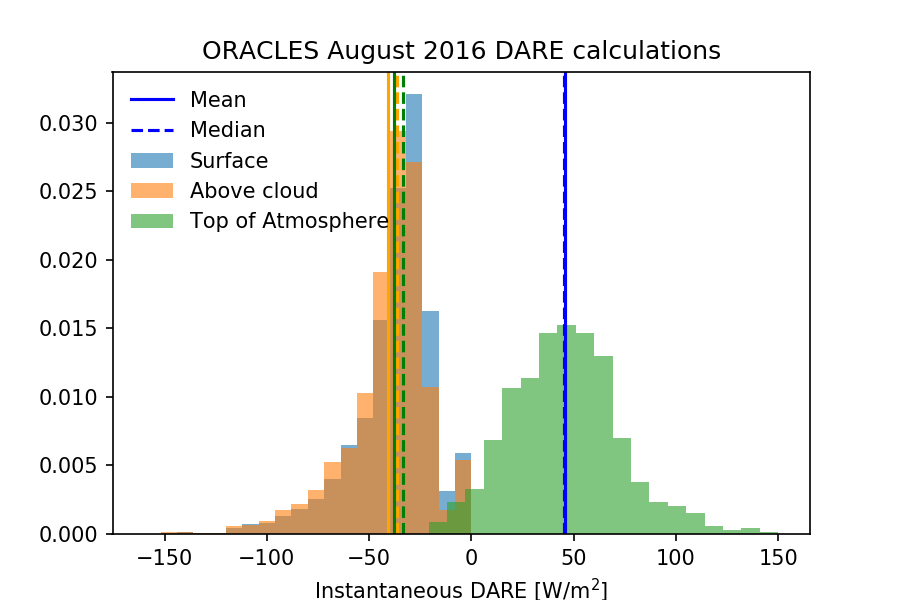

In [103]:
plt.figure(figsize=(6,4))

plt.hist(s['dare'][:,0],range=[-160,0],bins=20,label='Surface',alpha=0.6,normed=True)
plt.hist(s['dare'][:,1],range=[-160,0],bins=20,label='Above cloud',alpha=0.6,normed=True)
plt.hist(s['dare'][:,2],range=[-30,150],bins=20,label='Top of Atmosphere',alpha=0.6,normed=True)

plt.axvline(np.nanmean(s['dare'][:,2]),ls='-',color='b',label='Mean')
plt.axvline(np.nanmedian(s['dare'][:,2]),ls='--',color='b',label='Median')
plt.axvline(np.nanmean(s['dare'][:,1]),ls='-',color='orange')
plt.axvline(np.nanmedian(s['dare'][:,1]),ls='--',color='orange')
plt.axvline(np.nanmean(s['dare'][:,0]),ls='-',color='g')
plt.axvline(np.nanmedian(s['dare'][:,0]),ls='--',color='g')

#pu.prelim()

plt.xlabel('Instantaneous DARE [W/m$^{{2}}$]')
plt.legend(frameon=False,loc=2)

plt.title('ORACLES August 2016 DARE calculations')
plt.savefig(fp+'plot_DARE/ORACLES_2016_DARE_normhist_{}.png'.format(vv),dpi=600,transparent=True)

In [48]:
igood = np.isfinite(s['dare'][:,0])

<IPython.core.display.Javascript object>


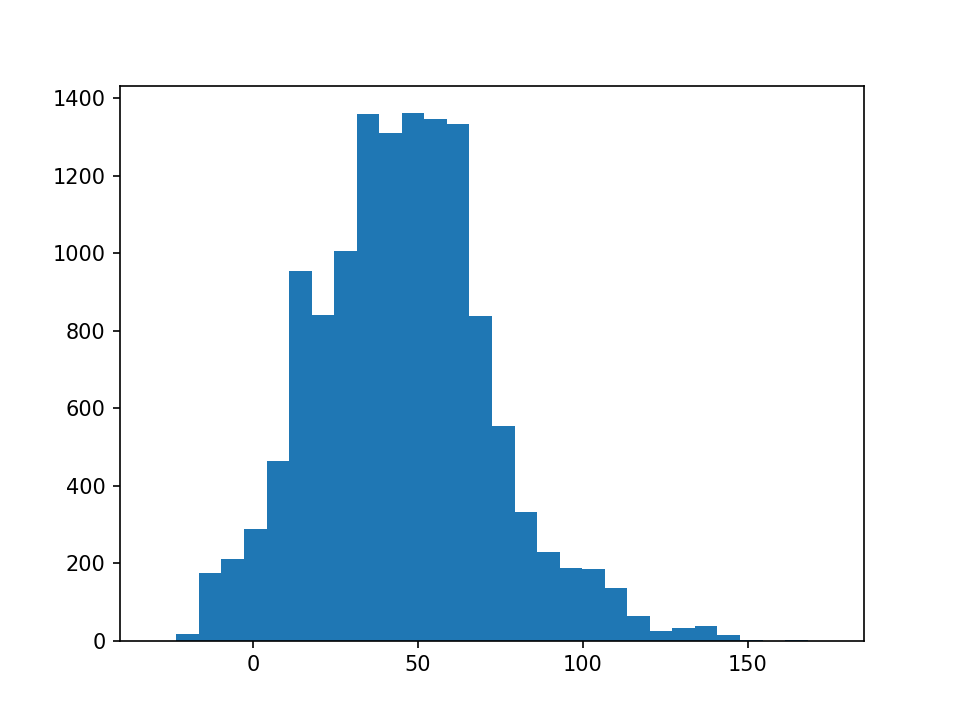

(array([0.000e+00, 1.800e+01, 1.750e+02, 2.100e+02, 2.880e+02, 4.640e+02,
        9.540e+02, 8.420e+02, 1.007e+03, 1.359e+03, 1.312e+03, 1.363e+03,
        1.348e+03, 1.335e+03, 8.390e+02, 5.550e+02, 3.330e+02, 2.290e+02,
        1.890e+02, 1.850e+02, 1.360e+02, 6.500e+01, 2.600e+01, 3.400e+01,
        3.800e+01, 1.500e+01, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00]),
 array([-30.        , -23.16666667, -16.33333333,  -9.5       ,
         -2.66666667,   4.16666667,  11.        ,  17.83333333,
         24.66666667,  31.5       ,  38.33333333,  45.16666667,
         52.        ,  58.83333333,  65.66666667,  72.5       ,
         79.33333333,  86.16666667,  93.        ,  99.83333333,
        106.66666667, 113.5       , 120.33333333, 127.16666667,
        134.        , 140.83333333, 147.66666667, 154.5       ,
        161.33333333, 168.16666667, 175.        ]),
 <a list of 30 Patch objects>)

In [50]:
plt.figure()
plt.hist(s['dare'][igood,2],bins=30,range=[-30,175])

In [51]:
np.nanmean(s['dare'][igood,2]),np.nanmedian(s['dare'][igood,2]),np.nanstd(s['dare'][igood,2])

(45.783324266666185, 45.2977981687402, 26.882576259427523)

## Make the boxes

The observations and model data are aggregated within horizontal domains of at least 2o by 2o indicated in Fig. 2. One of the three main regions encompasses the routine flight track, with individual grid boxes centered at (14oE, 24oS), (12oE, 22oS), (10oE, 20oS), (8oE, 18oS), (6oE, 16oS), (4oE, 14oS), (2oE, 12oS) and (0oE, 10oS). Another more coastal north-south track has the southernmost grid box centered on 22oS, spanning between 9oE and 11.75oE. Seven grid boxes are located every 2 degrees north of this, with the northernmost grid box centered on 8oS. A third, zonal track covers the larger domain of the ER2 measurements, with individual grid boxes spanning latitudinally between 10oS and 6oS and separated longitudinally at two degree intervals beginning at 3oW to the west and 13oE in the east. The box for St. Helena Island spans between 6.72 oW and 4.72 oW, between 16.933 oS and 14.933 oS.

In [52]:
boxes_diag = []
boxes_ns = []
boxes_ew = []

In [53]:
boxes_diag_ct = [[14.0,-24.0], [12.0,-22.0],[10.0,-20.0],[8.0,-18.0],[6.0,-16.0],[4.0,-14.0],[2.0,-12.0],[0.0,-10.0]]
boxes_ns_ct = [[10.5,-22.0],[10.5,-20.0],[10.5,-18.0],[10.5,-16.0],[10.5,-14.0],[10.5,-12.0],[10.5,-10.0],[10.5,-8.0]]
boxes_ew_ct = [[-3.0,-8.0],[-1.0,-8.0],[1.0,-8.0],[3.0,-8.0],[5.0,-8.0],[7.0,-8.0],[9.0,-8.0],[11.0,-8.0],[13.0,-8.0]]

Corners are [x0,x1,y0,y1]

In [54]:
boxes_ns = [[9.0,11.75,i[1]-1.0,i[1]+1.0] for i in boxes_ns_ct]

In [55]:
boxes_ew = [[-10.0,-6.0,i[0]-1.0,i[0]+1.0] for i in boxes_ew_ct]

In [56]:
boxes_diag = [[i[0]-1.0,i[0]+1,i[1]-1.0,i[1]+1.0] for i in boxes_diag_ct]

In [57]:
boxes_diag

[[13.0, 15.0, -25.0, -23.0],
 [11.0, 13.0, -23.0, -21.0],
 [9.0, 11.0, -21.0, -19.0],
 [7.0, 9.0, -19.0, -17.0],
 [5.0, 7.0, -17.0, -15.0],
 [3.0, 5.0, -15.0, -13.0],
 [1.0, 3.0, -13.0, -11.0],
 [-1.0, 1.0, -11.0, -9.0]]

In [58]:
boxes_ew

[[-10.0, -6.0, -4.0, -2.0],
 [-10.0, -6.0, -2.0, 0.0],
 [-10.0, -6.0, 0.0, 2.0],
 [-10.0, -6.0, 2.0, 4.0],
 [-10.0, -6.0, 4.0, 6.0],
 [-10.0, -6.0, 6.0, 8.0],
 [-10.0, -6.0, 8.0, 10.0],
 [-10.0, -6.0, 10.0, 12.0],
 [-10.0, -6.0, 12.0, 14.0]]

In [59]:
boxes_ns

[[9.0, 11.75, -23.0, -21.0],
 [9.0, 11.75, -21.0, -19.0],
 [9.0, 11.75, -19.0, -17.0],
 [9.0, 11.75, -17.0, -15.0],
 [9.0, 11.75, -15.0, -13.0],
 [9.0, 11.75, -13.0, -11.0],
 [9.0, 11.75, -11.0, -9.0],
 [9.0, 11.75, -9.0, -7.0]]

In [60]:
bins_diag = []
for i,b in enumerate(boxes_diag):
    ia = (s['lon'][igood]>= b[0]) & (s['lon'][igood]<=b[1]) &(s['lat'][igood]>=b[2]) & (s['lat'][igood]<=b[3]) & (np.isfinite(s['dare'][igood,2]))
    bins_diag.append(s['dare'][igood,2][ia])

In [61]:
bins_diag[0] = bins_diag[1][0:5]

In [62]:
bins_ns = []
for i,b in enumerate(boxes_ns):
    ia = (s['lon'][igood]>= b[0]) & (s['lon'][igood]<=b[1]) &(s['lat'][igood]>=b[2]) & (s['lat'][igood]<=b[3]) & (np.isfinite(s['dare'][igood,2]))
    bins_ns.append(s['dare'][igood,2][ia])

In [63]:
bins_ns[-1] = bins_ns[-2][0:5]

In [64]:
bins_ew = []
for i,b in enumerate(boxes_ew):
    ia = (s['lon'][igood]>= b[0]) & (s['lon'][igood]<=b[1]) &(s['lat'][igood]>=b[2]) & (s['lat'][igood]<=b[3]) & (np.isfinite(s['dare'][igood,2]))
    bins_ew.append(s['dare'][igood,2][ia])

In [65]:
len(boxes_diag),len(bins_diag)

(8, 8)

<IPython.core.display.Javascript object>


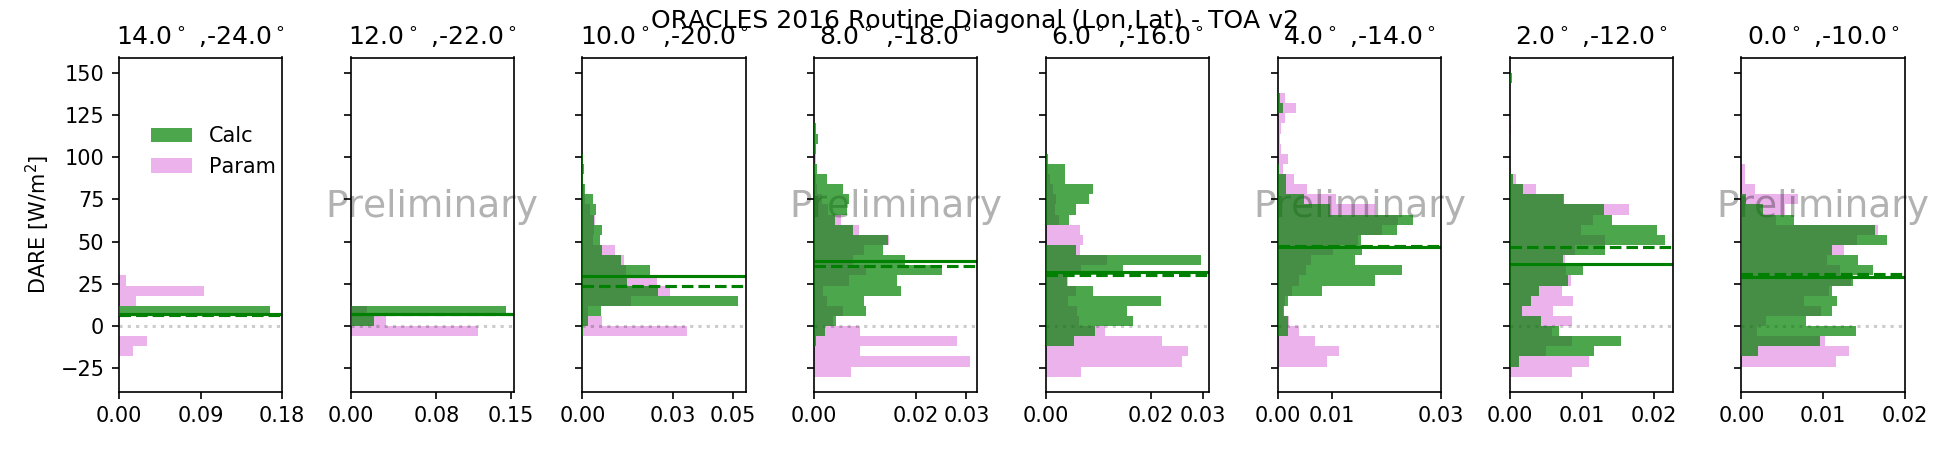

In [86]:
[fig,ax] = plt.subplots(1,8,figsize=(13,3))

for i,b in enumerate(boxes_diag_ct):
    ax[i].hist(bins_diag[i],bins=30,edgecolor='None',alpha=0.7,color='g',range=(-30,150),
               zorder=10,normed=True,orientation='horizontal',label='Calc')
    ax[i].hist(sa['bins_diag'][0,i][0],bins=30,edgecolor='None',alpha=0.3,color='m',range=(-30,150),
               zorder=-1,normed=True,orientation='horizontal',label='Param')
    ax[i].axhline(np.nanmean(bins_diag[i]),color='g')#,label='mean')
    ax[i].axhline(np.nanmedian(bins_diag[i]),color='g',linestyle='--')#,label='median')
    xmin, xmax = ax[i].get_xlim()
    ax[i].set_xticks(np.round(np.linspace(xmin, xmax, 3), 2))
    if i>0:
        [ag.set_visible(False) for ag in ax[i].yaxis.get_ticklabels()]
    if i==0:
        ax[i].legend(frameon=False,bbox_to_anchor=[0.08, 0.85])
    ax[i].set_title('{}$^\\circ$ ,{}$^\\circ$'.format(b[0],b[1]))
    ax[i].axhline(0,ls=':',color='k',alpha=0.2)
    if i%2: pu.prelim(ax[i])
ax[0].set_ylabel('DARE [W/m$^2$]')
fig.suptitle('ORACLES 2016 Routine Diagonal (Lon,Lat) - TOA {}'.format(vv))
fig.tight_layout()
plt.savefig(fp+'plot_DARE/ORACLES_2016_DARE_TOA_calc_diag_boxes_{}.png'.format(vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


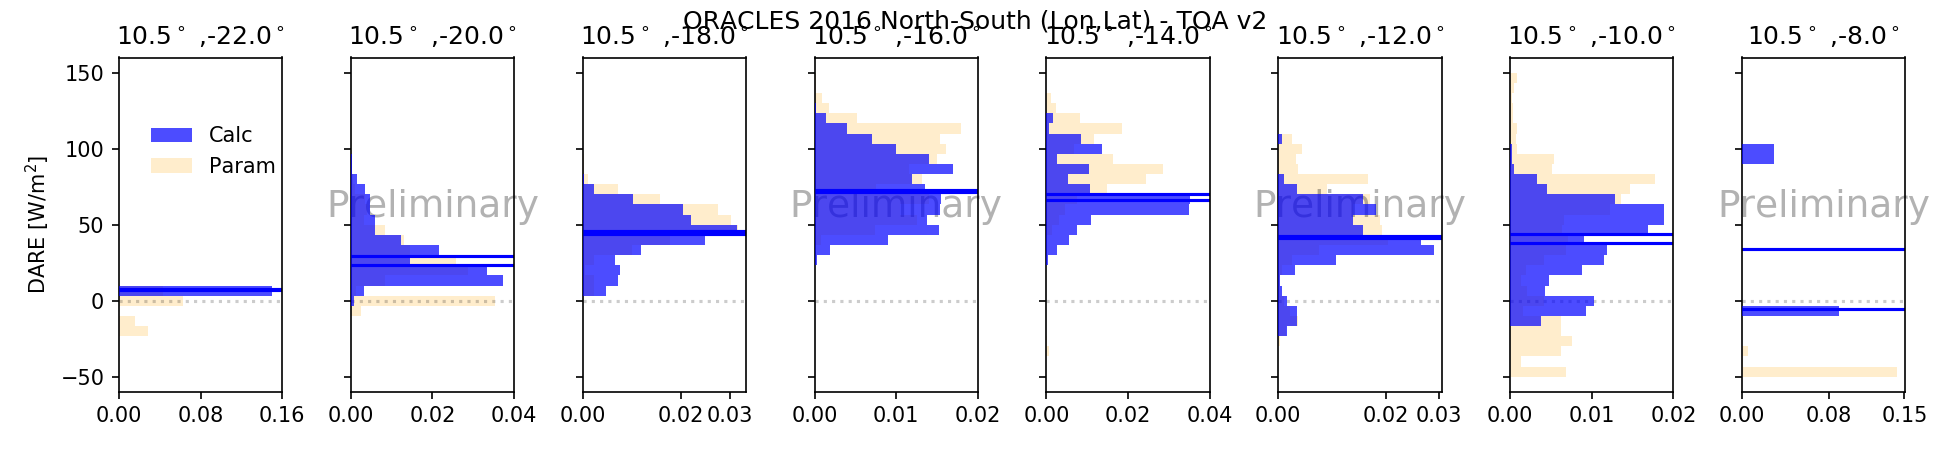

In [88]:
[fig,ax] = plt.subplots(1,8,figsize=(13,3))

for i,b in enumerate(boxes_ns_ct):
    ax[i].hist(bins_ns[i],bins=30,edgecolor='None',alpha=0.7,color='b',range=(-50,150),zorder=10,normed=True,orientation='horizontal',label='Calc')
    ax[i].hist(sa['bins_ns'][0,i][0],bins=30,edgecolor='None',alpha=0.2,color='orange',range=(-50,150),zorder=-1,normed=True,orientation='horizontal',label='Param')
    ax[i].axhline(np.nanmean(bins_ns[i]),color='b')#,label='mean')
    ax[i].axhline(np.nanmedian(bins_ns[i]),color='b')#,linestyle='--',label='median')
    xmin, xmax = ax[i].get_xlim()
    ax[i].set_xticks(np.round(np.linspace(xmin, xmax, 3), 2))
    if i>0:
        [ag.set_visible(False) for ag in ax[i].yaxis.get_ticklabels()]
    else:
        ax[i].legend(frameon=False,bbox_to_anchor=[0.08,0.85])
    ax[i].set_title('{}$^\\circ$ ,{}$^\\circ$'.format(b[0],b[1]))
    ax[i].axhline(0,ls=':',color='k',alpha=0.2)
    if i%2: pu.prelim(ax[i])
ax[0].set_ylabel('DARE [W/m$^2$]')
fig.suptitle('ORACLES 2016 North-South (Lon,Lat) - TOA {}'.format(vv))
fig.tight_layout()
plt.savefig(fp+'plot_DARE/ORACLES_2016_DARE_TOA_calc_ns_boxes_{}.png'.format(vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


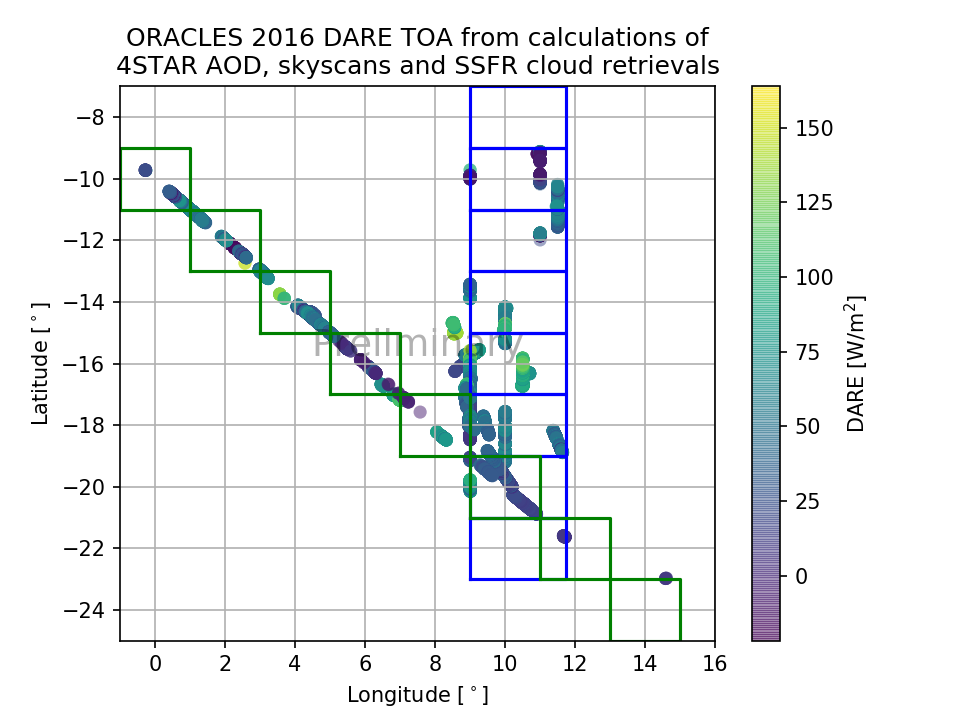

In [70]:
plt.figure()
sca = plt.scatter(s['lon'][igood],s['lat'][igood],c=s['dare'][igood,2],edgecolor='None',s=40,alpha=0.5,cmap=plt.cm.viridis)
plt.grid()
plt.xlim(-1,16)
plt.xlabel('Longitude [$^\\circ$]')
plt.ylabel('Latitude [$^\\circ$]')
cb = plt.colorbar(sca)
cb.set_label('DARE [W/m$^2$]')
pu.prelim()

for i,b in enumerate(boxes_ns): 
    plt.plot([b[0],b[0],b[1],b[1],b[0]],[b[2],b[3],b[3],b[2],b[2]],'-b')
for i,b in enumerate(boxes_diag): 
    plt.plot([b[0],b[0],b[1],b[1],b[0]],[b[2],b[3],b[3],b[2],b[2]],'-g')

plt.ylim(-25,-7)
plt.title('ORACLES 2016 DARE TOA from calculations of\n4STAR AOD, skyscans and SSFR cloud retrievals')
plt.savefig(fp+'plot_DARE/ORACLES_2016_DARE_TOA_calc_map_param_{}.png'.format(vv),dpi=600,transparent=True)